In [24]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
import psycopg2
from psycopg2 import Error

import os
path = os.path.join(os.path.expanduser('~'), 'Documents', 'github.passwords', 'energy.predictor.2020.config')
print (path)

myfile = open(path,"rt")
config= myfile.read()

/home/douglas/Documents/github.passwords/energy.predictor.2020.config


## Distribution

### Number of data points per meter type

In [26]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

In [27]:
# Read PostgreSQL into a dataframe
sql =''' SELECT 
            t.timestamp,
            t.meter,
            t.meter_reading
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
meter_distribution = pd.read_sql_query(sql,connection)

In [28]:
if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


In [6]:
meter_distribution

,timestamp,meter,meter_reading
0,2016-01-01 00:00:00,0,72.0612
1,2016-01-01 00:00:00,0,0.0000
2,2016-01-01 00:00:00,0,0.0000
3,2016-01-01 00:00:00,0,0.0000
4,2016-01-01 00:00:00,0,0.0000
...,...,...,...
17684649,2016-12-05 12:00:00,0,68.0000
17684650,2016-12-05 12:00:00,1,93.7948
17684651,2016-12-05 12:00:00,3,405.7480
17684652,2016-12-05 12:00:00,0,262.3500


<AxesSubplot:xlabel='meter', ylabel='count'>

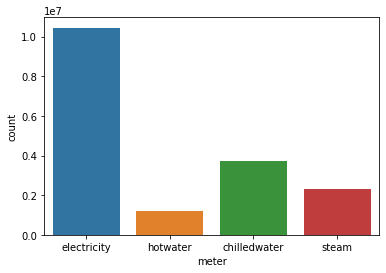

In [7]:
meterName = {0: 'electricity', 1: 'chilledwater', 2: 'steam', 3: 'hotwater'}
meter_distribution['meter'] = meter_distribution['meter'].map(meterName)

sns.countplot(x='meter',data=meter_distribution)

### Meter distribution

In [8]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

In [9]:
# Read PostgreSQL into a dataframe
sql =''' SELECT 
            bm.site_id,
            bm.building_id,
            t.meter
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
meter_distribution = pd.read_sql_query(sql,connection)

In [10]:
if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


<AxesSubplot:xlabel='meter', ylabel='count'>

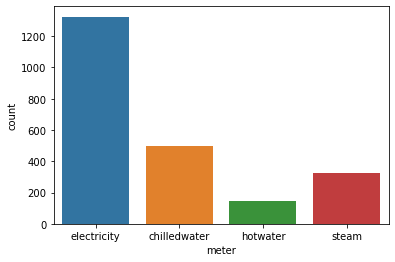

In [11]:
meter_distribution = meter_distribution.drop_duplicates()

meter_distribution['meter'] = meter_distribution['meter'].map(meterName)

sns.countplot(x='meter',data=meter_distribution)

### Where are they located, site id breakdown

In [12]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

In [13]:
# Read PostgreSQL into a dataframe
sql =''' SELECT 
            bm.site_id,
            bm.building_id,
            t.meter
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
meter_distribution = pd.read_sql_query(sql,connection)

In [14]:
if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


<AxesSubplot:xlabel='site_id', ylabel='count'>

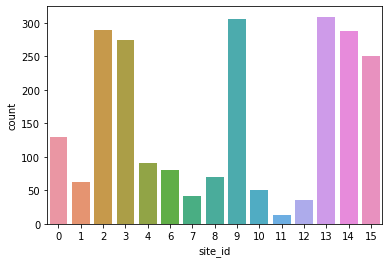

In [15]:
meter_distribution = meter_distribution.drop_duplicates()



sns.countplot(x='site_id',data=meter_distribution)

#### Observation

Should sites below 100, 150 be dropped?

### Distribution of Square Feet

In [16]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

# Read PostgreSQL into a dataframe
sql =''' SELECT 
            bm.building_id,
            bm.square_feet
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
sf_distribution = pd.read_sql_query(sql,connection)

if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


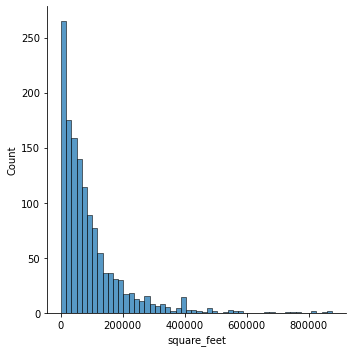

In [17]:
sf_distribution = sf_distribution.drop_duplicates()



sns.displot(sf_distribution.square_feet)

#### Observations

Lower square foot buildings may have more clear relationship to energy use

### Building Use

In [18]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

# Read PostgreSQL into a dataframe
sql =''' SELECT 
            COUNT(DISTINCT bm.primary_use)
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
            ;'''
primary_use_count = pd.read_sql_query(sql,connection)

if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


In [19]:
primary_use_count

,count
0,16


In [22]:
connection = psycopg2.connect(config)

cursor = connection.cursor()

# Read PostgreSQL into a dataframe
sql =''' SELECT 
            bm.building_id,
            bm.primary_use
        FROM 
             weather_train AS w
         INNER JOIN building_metadata AS bm
             ON (bm.site_id = w.site_id)
         INNER JOIN train AS t
             ON (t.timestamp = w.timestamp) AND (t.building_id = bm.building_id)
         WHERE 
             w.timestamp IS NOT NULL 
             AND w.air_temperature IS NOT NULL 
             AND w.dew_temperature IS NOT NULL
             AND w.sea_level_pressure IS NOT NULL 
             AND w.wind_direction IS NOT NULL 
             AND w.wind_speed IS NOT NULL
             
             
            ;'''
pu_distribution = pd.read_sql_query(sql,connection)

if (connection):
        cursor.close()
        connection.close()
        print("PostgreSQL connection is closed")

PostgreSQL connection is closed


[Text(0, 0, 'Office'),
 Text(1, 0, 'Education'),
 Text(2, 0, 'Lodging/residential'),
 Text(3, 0, 'Entertainment/public assembly'),
 Text(4, 0, 'Public services'),
 Text(5, 0, 'Parking'),
 Text(6, 0, 'Other'),
 Text(7, 0, 'Retail'),
 Text(8, 0, 'Food sales and service'),
 Text(9, 0, 'Utility'),
 Text(10, 0, 'Healthcare'),
 Text(11, 0, 'Warehouse/storage'),
 Text(12, 0, 'Religious worship'),
 Text(13, 0, 'Technology/science'),
 Text(14, 0, 'Manufacturing/industrial'),
 Text(15, 0, 'Services')]

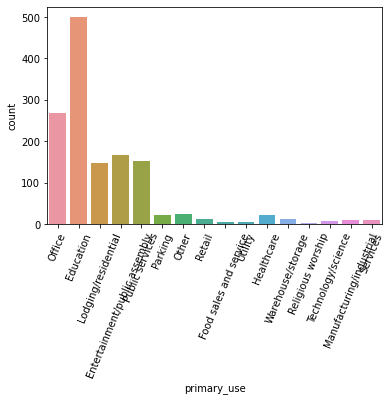

In [23]:
pu_distribution = pu_distribution.drop_duplicates()



chart=sns.countplot(x='primary_use',data=pu_distribution)
chart.set_xticklabels(chart.get_xticklabels(), rotation=67.5)